In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd

In [1]:


# Open tenant information dataset in a pandas dataframe

tenant_info_df = pd.read_csv(
    filepath_or_buffer="generateData/tenantInformation.csv"
)


In [2]:
# Show subset of data
tenant_info_df.head(5)

,UUID,Tenant_Name,Rent_Amount,Lease_Start_Date,Lease_End_Date,Utility_Amount,Pet_Amount,Tenant_Screening_Score
0,1,Richard Bailey,1500,2023-02-06,2024-02-06,114.52,10.0,688
1,2,Jessica Ramirez,1900,2023-09-20,2024-03-18,40.59,NaN,580
2,3,Jeffrey Anderson,1800,2023-07-13,2024-01-09,107.28,10.0,847
3,4,Emma Sanchez,1200,2023-12-02,2024-12-01,10.54,NaN,597
4,5,Jacob White,1300,2023-03-24,2023-09-20,150.88,NaN,753


In [3]:
tenant_info_df.dtypes

UUID                        int64
Tenant_Name                object
Rent_Amount                 int64
Lease_Start_Date           object
Lease_End_Date             object
Utility_Amount            float64
Pet_Amount                float64
Tenant_Screening_Score      int64
dtype: object

In [4]:
#Replace NaN values in Pet_Amount with 0.0
fill_na_values = {"Pet_Amount": 0.0}
tenant_info_df = tenant_info_df.fillna(value=fill_na_values)

# Convert Date Columns from Object to Datetime
tenant_info_df[["Lease_Start_Date", "Lease_End_Date"]] = tenant_info_df[["Lease_Start_Date", "Lease_End_Date"]].apply(pd.to_datetime)

tenant_info_df.dtypes

UUID                               int64
Tenant_Name                       object
Rent_Amount                        int64
Lease_Start_Date          datetime64[ns]
Lease_End_Date            datetime64[ns]
Utility_Amount                   float64
Pet_Amount                       float64
Tenant_Screening_Score             int64
dtype: object

In [5]:
tenant_info_df["Rent_Amount"].mean().round(2)

1463.16

In [7]:
rent_info_df = pd.read_csv(
    filepath_or_buffer="generateData/rentInformation.csv"
)
rent_info_df.head(5)

,Payment_ID,Tenant_UUID,Tenant_Name,Month_year,Rent_Paid_Date,Rent_Amount_Paid,Total_Rent_Amount,Rent_Amount_Due,Late_Payment
0,3e1a207f-f1ef-4b75-b908-0df07b8608ee,1,Richard Bailey,February_2023,2023-02-15,1624.52,1624.52,0.0,N
1,99ea606e-9361-4835-baa3-91e9942acb36,1,Richard Bailey,March_2023,2023-03-31,1624.52,1624.52,0.0,Y
2,34708419-e7ad-49e4-92c9-130ede737c6d,1,Richard Bailey,April_2023,2023-04-14,1624.52,1624.52,0.0,N
3,220e8714-7e26-4891-b3c8-80d2277d8bda,1,Richard Bailey,May_2023,2023-05-10,1624.52,1624.52,0.0,N
4,7bf0d5d0-1b5e-4213-acae-9c6181c97d27,1,Richard Bailey,June_2023,2023-06-06,1624.52,1624.52,0.0,N


In [8]:
res1 = rent_info_df[rent_info_df["Late_Payment"]=="Y"].groupby(["Tenant_Name", "Tenant_UUID"]).count()["Late_Payment"]

for tenant_info, late_payment_count in res1.items():
    print(f"Tenant Name - {tenant_info[0]}, Tenant UUID - {tenant_info[1]}, Late Payment Count - {late_payment_count}")

Tenant Name - Andrew Wilson, Tenant UUID - 12, Late Payment Count - 3
Tenant Name - Barbara Turner, Tenant UUID - 17, Late Payment Count - 3
Tenant Name - Daniel Rogers, Tenant UUID - 19, Late Payment Count - 4
Tenant Name - Emma Gomez, Tenant UUID - 11, Late Payment Count - 1
Tenant Name - Emma Sanchez, Tenant UUID - 4, Late Payment Count - 1
Tenant Name - Jacob White, Tenant UUID - 5, Late Payment Count - 5
Tenant Name - Jeffrey Anderson, Tenant UUID - 3, Late Payment Count - 4
Tenant Name - Jessica Ramirez, Tenant UUID - 2, Late Payment Count - 4
Tenant Name - Kathleen Murphy, Tenant UUID - 6, Late Payment Count - 3
Tenant Name - Linda Cooper, Tenant UUID - 13, Late Payment Count - 2
Tenant Name - Matthew Mitchell, Tenant UUID - 18, Late Payment Count - 1
Tenant Name - Michael Sanchez, Tenant UUID - 15, Late Payment Count - 9
Tenant Name - Nicholas Martinez, Tenant UUID - 16, Late Payment Count - 2
Tenant Name - Richard Bailey, Tenant UUID - 1, Late Payment Count - 3
Tenant Name - R

In [9]:
tenant_rent_df = rent_info_df.merge(tenant_info_df, how = "left", left_on="Tenant_UUID", right_on="UUID")
tenant_rent_df.filter(items=["Tenant_Name_x", "Late_Payment", "Tenant_Screening_Score"])

,Tenant_Name_x,Late_Payment,Tenant_Screening_Score
0,Richard Bailey,N,688
1,Richard Bailey,Y,688
2,Richard Bailey,N,688
3,Richard Bailey,N,688
4,Richard Bailey,N,688
...,...,...,...
145,Daniel Rogers,N,789
146,Daniel Rogers,N,789
147,Daniel Rogers,N,789
148,Daniel Rogers,N,789


In [47]:
screening_payment_res = tenant_rent_df[tenant_rent_df["Late_Payment"]=="Y"].groupby(["Tenant_UUID", "Tenant_Screening_Score"]).count()["Late_Payment"]
print(screening_payment_res)

Tenant_UUID  Tenant_Screening_Score
1            688                       3
2            580                       4
3            847                       4
4            597                       1
5            753                       5
6            591                       3
8            562                       4
9            572                       1
11           613                       1
12           821                       3
13           714                       2
15           656                       9
16           707                       2
17           559                       3
18           658                       1
19           789                       4
Name: Late_Payment, dtype: int64


Text(0, 0.5, 'Late Payment Frequency')

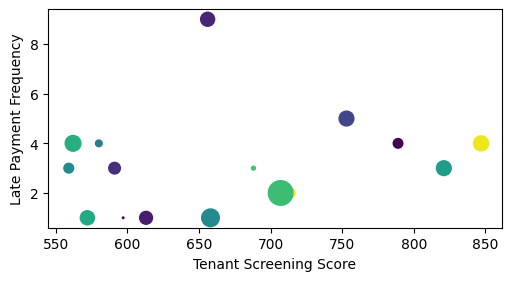

In [84]:
scatter_plot_data = {
    "tenant_screening_score":[],
    "late_payment_count":[],
}
for index, count in screening_payment_res.items():
    scatter_plot_data["tenant_screening_score"].append(index[1])
    scatter_plot_data["late_payment_count"].append(count)
scatter_plot_data["color"] = np.random.randint(0, 50, len(scatter_plot_data["tenant_screening_score"]))
scatter_plot_data["size"] = np.random.randn(len(scatter_plot_data["tenant_screening_score"]))
scatter_plot_data["size"] = np.abs(scatter_plot_data["size"]) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter("tenant_screening_score", "late_payment_count", c="color", s="size", data=scatter_plot_data)
ax.set_xlabel("Tenant Screening Score")
ax.set_ylabel("Late Payment Frequency")

<BarContainer object of 12 artists>

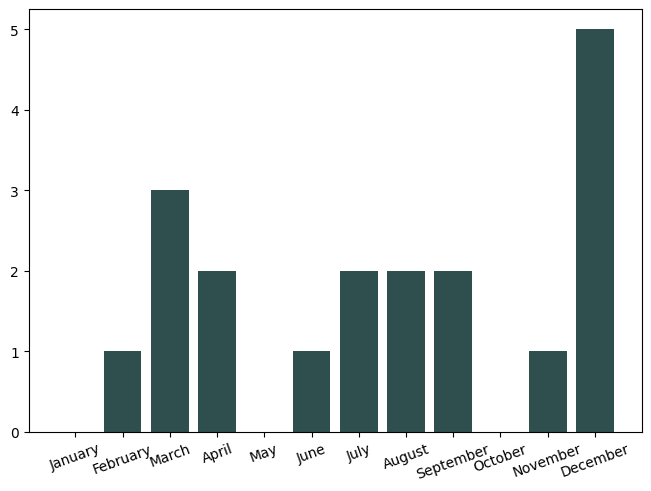

In [83]:
lease_start_month = tenant_info_df.groupby(tenant_info_df["Lease_Start_Date"].dt.month).count()["UUID"].rename("Frequency of Start Month")
month_map = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}

lease_month_barchart ={
} 
for init in month_map:
    lease_month_barchart[month_map[init]] = 0

for month, frequency in lease_start_month.items():
    lease_month_barchart[month_map[month]] = frequency

plt.figure(layout='constrained')
plt.xticks(rotation=20)
plt.bar(list(lease_month_barchart.keys()), height = list(lease_month_barchart.values()), color = "darkslategray")